In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
water_data = pd.read_csv("Vatten.csv")
WC1 = water_data[["Time1", "Temperature1"]]
WC2 = water_data[["Time2", "Temperature2"]]
WC3 = water_data[["Time3", "Temperature3"]]

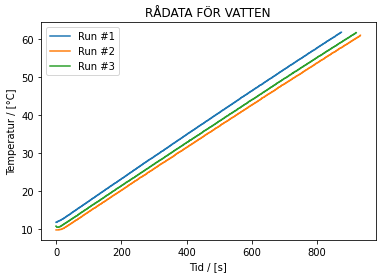

In [22]:
plt.plot(WC1["Time1"], WC1["Temperature1"], label = "Run #1")
plt.plot(WC2["Time2"], WC2["Temperature2"] ,  label = "Run #2")
plt.plot(WC3["Time3"], WC3["Temperature3"],  label = "Run #3")

plt.title("RÅDATA FÖR VATTEN")
plt.xlabel("Tid / [s]")
plt.ylabel("Temperatur / [\u00b0C]")
plt.legend()
plt.show()

In [6]:
oil_data = pd.read_csv("Olja.csv")
OC1 = oil_data[["Time1", "Temperature1"]]
OC2 = oil_data[["Time2", "Temperature2"]]
OC3 = oil_data[["Time3", "Temperature3"]]

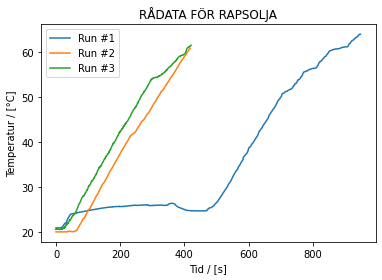

In [23]:
plt.plot(OC1["Time1"],OC1["Temperature1"], label = "Run #1")
plt.plot(OC2["Time2"], OC2["Temperature2"],  label = "Run #2")
plt.plot(OC3["Time3"], OC3["Temperature3"],  label = "Run #3")

plt.title("RÅDATA FÖR RAPSOLJA")
plt.xlabel("Tid / [s]")
plt.ylabel("Temperatur / [\u00b0C]")
plt.legend()
plt.show()

In [8]:
ATTIK_data = pd.read_csv("Attiksprit.csv")
AC1 = ATTIK_data[["Time1", "Temperature1"]]
AC2 = ATTIK_data[["Time 2", "Temperature2"]]
AC3 = ATTIK_data[["Time3", "Temperature3"]]

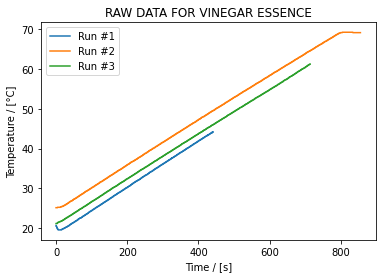

In [9]:
plt.plot(AC1["Time1"], AC1["Temperature1"], label = "Run #1")
plt.plot(AC2["Time 2"], AC2["Temperature2"],  label = "Run #2")
plt.plot(AC3["Time3"], AC3["Temperature3"],  label = "Run #3")

plt.title("RÅDATA FÖR ÄTTIKSPRIT")
plt.xlabel("Tid / [s]")
plt.ylabel("Temperatur / [\u00b0C]")
plt.legend()
plt.show()

In [10]:
GLY_data1 = pd.read_csv("Glykol1.csv")
GLY_data2 = pd.read_csv("Glykol2.csv")
GC1 = GLY_data1[["Time1", "Temperature1 "]]
GC2 = GLY_data1[["Time2", "Temperature2"]]
GC3 = GLY_data2[["Time", "Temperature"]]

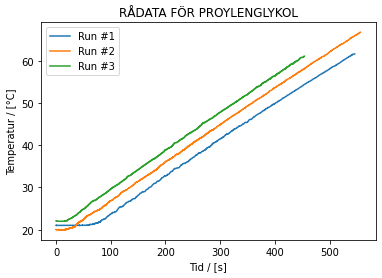

In [24]:
plt.plot(GC1["Time1"], GC1["Temperature1 "], label = "Run #1")
plt.plot(GC2["Time2"], GC2["Temperature2"],  label = "Run #2")
plt.plot(GC3["Time"], GC3["Temperature"],  label = "Run #3")

plt.title("RÅDATA FÖR PROYLENGLYKOL")
plt.xlabel("Tid / [s]")
plt.ylabel("Temperatur / [\u00b0C]")
plt.legend()
plt.show()

In [12]:
MO1 = 5471.5 + 50
MO2 = 5471.5
MO3 = 5289.84

MA1 = (1044 - 29) * 6
MA2 = 6059.46
MA3 = 6014.61

MW1 = 5768.21
MW2 = 5758.3
MW3 = 5837.58

MG1 = 5650
MG2 = 5600.08
MG3 = 5550.26

dM = 0.1
dT = 0.5

Cv = 4.1816

In [13]:
fitp1 = np.polyfit(WC1["Time1"][0:8740], WC1["Temperature1"][0:8740], deg = 1)
fitp2 = np.polyfit(WC2["Time2"], WC2["Temperature2"], deg = 1)
fitp3 = np.polyfit(WC3["Time3"][0:9199], WC3["Temperature3"][0:9199], deg = 1)

In [14]:
P1 = (MW1 * Cv) * fitp1[0]
P2 = (MW2 * Cv) * fitp2[0]
P3 = (MW3 * Cv) * fitp3[0]


f1 = np.poly1d(fitp1)(WC1["Time1"][0:8740])
f2 = np.poly1d(fitp2)(WC2["Time2"])
f3 = np.poly1d(fitp3)(WC3["Time3"][0:9199])


DEL1 = np.size(WC1["Time1"][0:8740]) * np.sum(WC1["Time1"][0:8740]**2) - np.sum(WC1["Time1"][0:8740]) **2
DEL2 = np.size(WC2["Time2"]) * np.sum(WC2["Time2"]**2) - np.sum(WC2["Time2"]) **2
DEL3 = np.size(WC3["Time3"][0:9199]) * np.sum(WC3["Time3"][0:9199]**2) - np.sum(WC3["Time3"][0:9199]) **2
dT_tot1 = np.sqrt((1/(np.size(np.size(WC1["Temperature1"][0:8740] - 2))))*(np.sum(WC1["Temperature1"][0:8740] - f1)**2))
dT_tot2 = np.sqrt((1/(np.size(np.size(WC2["Temperature2"] - 2))))*(np.sum(WC2["Temperature2"] - f2)**2))
dT_tot3 = np.sqrt((1/(np.size(np.size(WC3["Temperature3"][0:9199] - 2))))*(np.sum(WC3["Temperature3"][0:9199] - f3)**2))

dA1 = dT_tot1 * np.sqrt(np.size(WC1["Time1"][0:8740])/DEL1)
dA2 = dT_tot2 * np.sqrt(np.size(WC2["Time2"])/DEL2)
dA3 = dT_tot3 * np.sqrt(np.size(WC3["Time3"][0:9199])/DEL3)


dPsys = np.sqrt(dM**2 + dT**2)
dPran1 = np.sqrt((MW1 * Cv * dA1 )**2)
dPran2 = np.sqrt((MW2 * Cv * dA2)**2)
dPran3 = np.sqrt((MW3 * Cv * dA3)**2)

dP1 = np.sqrt(dPsys**2 + dPran1**2 )
dP2 = np.sqrt(dPsys**2 + dPran2**2 )
dP3 = np.sqrt(dPsys**2 + dPran3**2 )


W1 = 1/(dP1 ** 2)
W2 = 1/(dP2 ** 2)
W3 = 1/(dP3 ** 2)


P = (P1 * W1 + P2 * W2 + P3 * W3)/(W1 + W2 + W3)
dP = 1/np.sqrt(W1) + 1/np.sqrt(W2) + 1/np.sqrt(W3)

print("P =", np.round(P,1), "\u00b1",np.round(dP, 1), "J/s")

P = 1370.3 ± 1.5 J/s


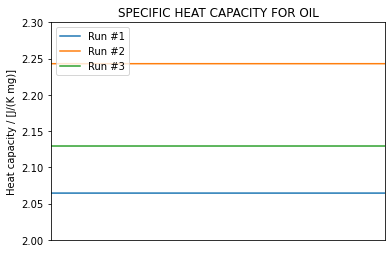

In [15]:
DEG = 1
upp = 13000
low = 9999

fitO1 = np.polyfit(OC1["Time1"][9999:13000], OC1["Temperature1"][9999:13000], DEG)
fitO2 = np.polyfit(OC2["Time2"][2000:8361], OC2["Temperature2"][2000:8361], DEG)
fitO3 = np.polyfit(OC3["Time3"][2000:5000], OC3["Temperature3"][2000:5000], DEG)

T1 = np.poly1d(fitO1)
CO1 = P * (1/MO1) * (1/T1.deriv()(OC1["Time1"]))

T2 = np.poly1d(fitO2)
CO2 = P * (1/MO2) * (1/T2.deriv()(OC2["Time2"]))

T3 = np.poly1d(fitO3)
CO3 = P * (1/MO3) * (1/T3.deriv()(OC3["Time3"]))

plt.plot(OC1["Temperature1"] + 274.15,CO1, label = "Run #1")
plt.plot(OC2["Temperature2"]+ 274.15,CO2, label = "Run #2")
plt.plot(OC3["Temperature3"]+ 274.15,CO3, label = "Run #3")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.xlim([300,320])
plt.ylim([2, 2.3]) 
plt.title("SPECIFIC HEAT CAPACITY FOR OIL")
plt.xlabel("Temperature / [\u00b0C]")
plt.ylabel("Heat capacity / [J/(K mg)]")
plt.legend()
plt.show()

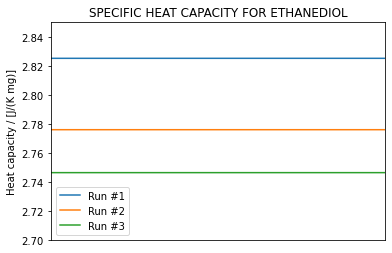

In [16]:
DEG = 1

fitG1 = np.polyfit(GC1["Time1"][1500:10917], GC1["Temperature1 "][1500:10917], DEG)
fitG2 = np.polyfit(GC2["Time2"][1500:], GC2["Temperature2"][1500:], DEG)
fitG3 = np.polyfit(GC3["Time"][1500:], GC3["Temperature"][1500:], DEG)

T1 = np.poly1d(fitG1)
CE1 = P * (1/MG1) * (1/T1.deriv()(GC1["Time1"]))

T2 = np.poly1d(fitG2)
CE2 = P * (1/MG2) * (1/T2.deriv()(GC2["Time2"]))

T3 = np.poly1d(fitG3)
CE3 = P * (1/MG3) * (1/T3.deriv()(GC3["Time"]))

plt.plot(GC1["Temperature1 "] + 274.15,CE1, label = "Run #1")
plt.plot(GC2["Temperature2"] + 274.15,CE2, label = "Run #2")
plt.plot(GC3["Temperature"] + 274.15,CE3, label = "Run #3")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.xlim([300,320])
plt.ylim([2.7, 2.85]) 
plt.title("SPECIFIC HEAT CAPACITY FOR ETHANEDIOL")
plt.xlabel("Temperature [K]")
plt.ylabel("Heat capacity / [J/(K mg)]")
plt.legend()
plt.show()

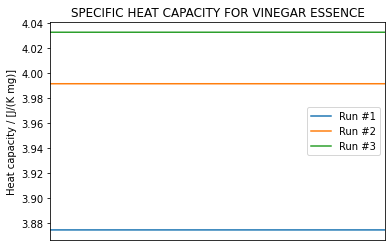

In [17]:
DEG = 1

fitA1 = np.polyfit(AC1["Time1"], AC1["Temperature1"], DEG)
fitA2 = np.polyfit(AC2["Time 2"][2000:5000], AC2["Temperature2"][2000:5000], DEG)
fitA3 = np.polyfit(AC3["Time3"][:7136], AC3["Temperature3"][:7136], DEG)

T1 = np.poly1d(fitA1)
CA1 = P * (1/MA1) * (1/T1.deriv()(AC1["Time1"]))

T2 = np.poly1d(fitA2)
CA2 = P * (1/MA2) * (1/T2.deriv()(AC2["Time 2"]))

T3 = np.poly1d(fitA3)
CA3 = P * (1/MA3) * (1/T3.deriv()(AC3["Time3"]))

plt.plot(AC1["Temperature1"] + 274.15,CA1, label = "Run #1")
plt.plot(AC2["Temperature2"] + 274.15,CA2, label = "Run #2")
plt.plot(AC3["Temperature3"] + 274.15,CA3, label = "Run #3")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.xlim([300,310])
plt.title("SPECIFIC HEAT CAPACITY FOR VINEGAR ESSENCE")
plt.xlabel("Temperature [K]")
plt.ylabel("Heat capacity / [J/(K mg)]")
plt.legend()
plt.show()

In [18]:
dHO1 = np.sqrt(((1/(MO1 * CO1[0])) * dP) **2 + (P/((MO1**2)* CO1[0])**2))
dHO2 = np.sqrt(((1/(MO2 * CO2[0])) * dP) **2 + (P/((MO2**2)* CO2[0])**2))
dHO3 = np.sqrt(((1/(MO3 * CO3[0])) * dP) **2 + (P/((MO3**2)* CO3[0])**2) )

W1 = 1/(dHO1**2)
W2 = 1/(dHO2**2)
W3 = 1/(dHO3**2)

HEAT_OIL = (CO1[0] * W1 + CO2[0] * W2 + CO3[0] * W3)/(W1 + W2 + W3)
SIGMA_HEAT_OIL = 1/(np.sqrt(W1)) + 1/(np.sqrt(W2)) + 1/(np.sqrt(W3))
print(HEAT_OIL)
print(SIGMA_HEAT_OIL)

2.150670998597447
0.00039465045892791593


In [19]:
dGO1 = np.sqrt(((1/(MG1 * CE1[0])) * dP) **2 + (P/((MG1**2)* CE1[0])**2))
dGO2 = np.sqrt(((1/(MG2 * CE2[0])) * dP) **2 + (P/((MG2**2)* CE2[0])**2))
dGO3 = np.sqrt(((1/(MG3 * CE3[0])) * dP) **2 + (P/((MG3**2)* CE3[0])**2))


W1 = 1/(dGO1**2)
W2 = 1/(dGO2**2)
W3 = 1/(dGO3**2)

HEAT_ETHANDIOL = (CE1[0] * W1 + CE2[0] * W2 + CE3[0] * W3)/(W1 + W2 + W3)
SIGMA_HEAT_ETHANDIOL = 1/(np.sqrt(W1)) + 1/(np.sqrt(W2)) + 1/(np.sqrt(W3))
print(HEAT_ETHANDIOL)
print(SIGMA_HEAT_ETHANDIOL)

2.7837226225334164
0.0002945921937320484


In [20]:
dAO1 = np.sqrt(((1/(MA1 * CA1[0])) * dP) **2 + (P/((MA1**2)* CA1[0])**2))
dAO2 = np.sqrt(((1/(MA2 * CA2[0])) * dP) **2 + (P/((MA2**2)* CA2[0])**2))
dAO3 = np.sqrt(((1/(MA3 * CA3[0])) * dP) **2 + (P/((MA3**2)* CA3[0])**2))

W1 = 1/(dAO1**2)
W2 = 1/(dAO2**2)
W3 = 1/(dAO3**2)


HEAT_VINEGAR = (CA1[0] * W1 + CA2[0] * W2 + CA3[0] * W3)/(W1 + W2 + W3)
SIGMA_HEAT_VINEGAR = 1/(np.sqrt(W1)) + 1/(np.sqrt(W2)) + 1/(np.sqrt(W3))
print(HEAT_VINEGAR)
print(SIGMA_HEAT_VINEGAR)

3.967688303416121
0.00019115360581104467


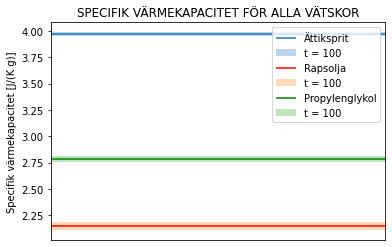

<Figure size 432x288 with 0 Axes>

In [27]:
t = 10**2

X = np.linspace(0, 10, 100)

plt.hlines(HEAT_VINEGAR,xmin=0 ,xmax = 10, label = "Ättiksprit")
plt.fill_between(X,HEAT_VINEGAR + SIGMA_HEAT_VINEGAR  * t, HEAT_VINEGAR - SIGMA_HEAT_VINEGAR *t, alpha = 0.3, label = "t = 100")

plt.hlines(HEAT_OIL,xmin=0 ,xmax = 10, label = "Rapsolja", color = "red")
plt.fill_between(X,HEAT_OIL + SIGMA_HEAT_OIL * t, HEAT_OIL - SIGMA_HEAT_OIL*t, alpha = 0.3, label = "t = 100")

plt.hlines(HEAT_ETHANDIOL,xmin=0 ,xmax = 10, label = "Propylenglykol", color = "green",)
plt.fill_between(X,HEAT_ETHANDIOL + SIGMA_HEAT_ETHANDIOL*t, HEAT_ETHANDIOL - SIGMA_HEAT_ETHANDIOL*t, alpha = 0.3, label = "t = 100")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.xlim([0,10])
plt.title("SPECIFIK VÄRMEKAPACITET FÖR ALLA VÄTSKOR")
plt.ylabel("Specifik värmekapacitet [J/(K g)]")
plt.legend()
plt.show()
plt.savefig("heat.png")